In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics,preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
path="/home/sultan/EEG/Source_level_frequency_analysis/100_base_corr_sam_NHIerp_band_features_noise.csv"
## the below one is the band_features
##path="/home/sultan/EEG/Source_level_frequency_analysis/100sam_NHIerp_band_features_clear.csv"
# path="/home/sultan/EEG/Source_level_frequency_analysis/100sam_NHIerp_band_features_noise.csv"
dataset =pd.read_csv(path)

In [3]:
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

In [4]:
rs=34

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=rs) 

In [6]:
X_test.shape, y_test.shape

((361, 272), (361,))

In [7]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([139, 222]))

# Grid search

In [8]:
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,0.002,0.00069,0.0007,0.0005]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [1, 6.5, 10, 20, 100, 1000], 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[0.90,1.00,1.25],'gamma':[3.0,3.25,3.25 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [10]:
# Average Scores
#  print clf.cv_results_
# clf.best_estimator_
# np.mean
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

Accuracy:0.881 (+/-0.086)


In [11]:
pred=clf.best_estimator_.predict(X_test)
acc=clf.score(X_test, y_test)
print ("Accuracy:", acc)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

('Accuracy:', 0.9362880886426593)
support: 50.7980569049


In [12]:
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[126,  13],
       [ 10, 212]])

In [13]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.93      0.91      0.92       139
        1.0       0.94      0.95      0.95       222

avg / total       0.94      0.94      0.94       361



In [14]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9307148875494199

In [15]:
clf.best_estimator_

SVC(C=6.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Whole brain accuracy and AUC

In [16]:
whc=pd.DataFrame([acc,roc_auc])
whc

,0
0,0.936288
1,0.930715


In [17]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1],'gamma':[0.01 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [18]:
k=0;j=68; acgw=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgw=np.append(acgw,acc)
    scores=clf.cv_results_['mean_test_score']
    print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print acc
    print k,j
    k=k+68;j=j+68;

Accuracy:0.835 (+/-0.048)
0.850415512465374
0 68
Accuracy:0.838 (+/-0.045)
0.8698060941828255
68 136
Accuracy:0.865 (+/-0.062)
0.9168975069252078
136 204
Accuracy:0.895 (+/-0.091)
0.9390581717451524
204 272


In [19]:
clf.best_estimator_

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.021, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
yr=X_test[:,0:68]
yr.shape

(361, 68)

In [21]:
dataset
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
# Xc

In [22]:
X.shape
np.max(acgw)

0.9390581717451524

# Hemisphere

### LH

In [23]:
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs) 
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
# print pred
# print y_test
print(classification_report(y_test, pred))

0.9279778393351801
Accuracy:0.882 (+/-0.078)
             precision    recall  f1-score   support

        0.0       0.91      0.91      0.91       139
        1.0       0.94      0.94      0.94       222

avg / total       0.93      0.93      0.93       361



In [24]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_lh = auc(false_positive_rate, true_positive_rate)
roc_auc_lh

0.9239581307926632

In [25]:
pred=clf.best_estimator_.predict(X_test)
acc_lh=clf.score(X_test, y_test)
print ("Accuracy:",acc_lh)   
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

('Accuracy:', 0.9279778393351801)
support: 38.0985426787


In [26]:
clf.best_estimator_

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
lhacau=pd.DataFrame([acc_lh,roc_auc_lh])
lhacau

,0
0,0.927978
1,0.923958


In [28]:
# only 34 features 
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
svc = svm.SVC()
k=0;j=34; acgr=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgr=np.append(acgr,acc)
    scores=clf.cv_results_['mean_test_score']
    print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print acc
    print k,j
    k=k+34;j=j+34;

Accuracy:0.783 (+/-0.015)
0.8088642659279779
0 34
Accuracy:0.787 (+/-0.016)
0.8337950138504155
34 68
Accuracy:0.815 (+/-0.027)
0.8781163434903048
68 102
Accuracy:0.883 (+/-0.047)
0.8919667590027701
102 136


### RH

In [29]:
b=range(1,(X.shape[1]),2)
d22=X[:,b];
X_train, X_test, y_train, y_test = train_test_split(d22,y, test_size=.20, random_state=rs) 
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
# print pred
# print y_test
print(classification_report(y_test, pred))

0.9224376731301939
Accuracy:0.881 (+/-0.062)
             precision    recall  f1-score   support

        0.0       0.89      0.91      0.90       139
        1.0       0.94      0.93      0.94       222

avg / total       0.92      0.92      0.92       361



In [30]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_rh = auc(false_positive_rate, true_positive_rate)
roc_auc_rh

0.9194536262881586

In [31]:
pred=clf.best_estimator_.predict(X_test)
acc_rh=clf.score(X_test, y_test)
print ("Accuracy:",acc_rh)   
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

('Accuracy:', 0.9224376731301939)
support: 39.6946564885


In [32]:
# acg=[];
# for i in range(0,6,2):
#     acg=np.append(acg,i)

In [33]:
clf.best_estimator_

SVC(C=60, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
rhacau=pd.DataFrame([acc_rh,roc_auc_rh])
rhacau

,0
0,0.922438
1,0.919454


In [35]:
k=0;j=34; acgl=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgl=np.append(acgl,acc)
    scores=clf.cv_results_['mean_test_score']
#     print scores
    print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print acc
    print k,j
    k=k+34;j=j+34;

Accuracy:0.817 (+/-0.022)
0.8310249307479224
0 34
Accuracy:0.821 (+/-0.022)
0.8254847645429363
34 68
Accuracy:0.848 (+/-0.025)
0.850415512465374
68 102
Accuracy:0.864 (+/-0.055)
0.8753462603878116
102 136


In [36]:
t=np.linspace(0,3,4, endpoint=True)
time=pd.DataFrame(t)
# a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgr),pd.DataFrame(acgl)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [37]:
np.max(acgl)
np.max(a.iloc[:,3])

0.8753462603878116

In [38]:
# wpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# dall=a
# # dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v1.csv')
# dall.to_csv(wpath+'svm_res_band_100sam_clear_v1.csv')

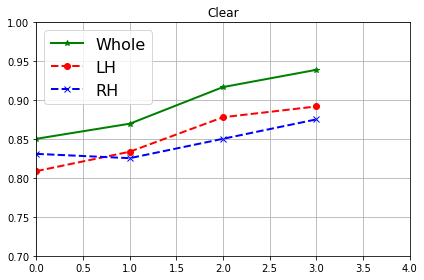

In [39]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
plt.title("Clear")
plt.xlim(0,4)
plt.ylim(0.7,1)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

In [40]:
len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

39.76405274115198

In [41]:
# dall

In [42]:
X_train.shape

(1441, 136)

In [43]:
type(whc)

pandas.core.frame.DataFrame

In [44]:
Ffe=pd.concat([whc,lhacau,rhacau],axis=1, keys=[ "Whole", "LH", "RH"])
Ffe

,Whole,LH,RH
,0,0,0
0,0.936288,0.927978,0.922438
1,0.930715,0.923958,0.919454


In [45]:
bb=a.iloc[:,1:]

In [46]:
# wrpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
bandallnoise=pd.concat([Ffe*100,bb*100],axis=0)
# # bandallclean.iloc[0:,:]
bandallnoise
# bandallclean.to_csv(wrpath+str(rs)+'Clear_band.csv')

,Whole,LH,RH
,0,0,0
0,93.628809,92.797784,92.243767
1,93.071489,92.395813,91.945363
0,85.041551,80.886427,83.102493
1,86.980609,83.379501,82.548476
2,91.689751,87.811634,85.041551
3,93.905817,89.196676,87.534626


In [47]:
clear=bandallnoise.values[1,:].tolist()
noise=bandallnoise.values[2,:].tolist()

In [48]:
clear

[93.071488754942, 92.39581307926632, 91.94536262881586]

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


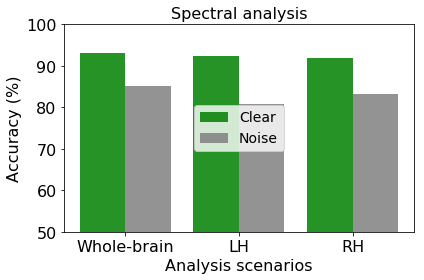

In [49]:
# clear=bandallclean.values[1,:].tolist()
# noise=bandallclean.values[2,:].tolist()
n_groups = 3
# clear = (61.29,54.83,54.83,61.29)
# noise = (85, 62, 54, 20)
#Random shuffle
# clear = [96.24,94.63,91.12]
# noise = [92.79,92.24,91.96] 
# create plot
axis_font = {'fontname':'Arial', 'size':'16'}
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.85
rects1 = plt.bar(index, clear, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Clear')
 
rects2 = plt.bar(index + bar_width, noise, bar_width,
                 alpha=opacity,
                 color='gray',
                 label='Noise') 
plt.xlabel('Analysis scenarios',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Spectral analysis',**axis_font)
plt.ylim(50,100)
plt.xticks(index + bar_width-0.2, ('Whole-brain','LH', 'RH'),**axis_font)
# plt.xticks(index + bar_width-0.2, (r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$'),**axis_font)
plt.yticks(**axis_font)
plt.legend(fontsize=14,loc=10)
# plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
clear=bandallnoise.values[2:,0].tolist()
noise=bandallnoise.values[2:,0].tolist()

In [51]:
clear

[85.0415512465374, 86.98060941828255, 91.68975069252078, 93.90581717451524]

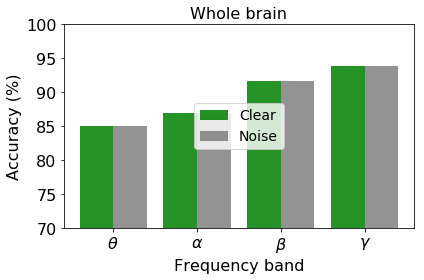

In [52]:
n_groups = 4
#Random shuffle
# clear = [67.74,70.97,54.84,48.38]
# noise = [54.84,45.16,38.71,45.16] 
# create plot
axis_font = {'fontname':'Arial', 'size':'16'}
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.85
rects1 = plt.bar(index, clear, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Clear')
 
rects2 = plt.bar(index + bar_width, noise, bar_width,
                 alpha=opacity,
                 color='gray',
                 label='Noise') 
plt.xlabel('Frequency band',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Whole brain',**axis_font)
plt.ylim(70,100)
#plt.xticks(index + bar_width-0.2, ('Theta','Alpha', 'Beta', 'Gamma'))
plt.xticks(index + bar_width-0.2, (r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$'),**axis_font)
plt.yticks(**axis_font)
plt.legend(fontsize=14,loc='center')
# plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

#### Writing into a csv file

In [53]:
bandallnoise

,Whole,LH,RH
,0,0,0
0,93.628809,92.797784,92.243767
1,93.071489,92.395813,91.945363
0,85.041551,80.886427,83.102493
1,86.980609,83.379501,82.548476
2,91.689751,87.811634,85.041551
3,93.905817,89.196676,87.534626


In [54]:
wrpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
bandallnoise=pd.concat([Ffe*100,bb*100],axis=0)
# bandallclean.iloc[0:,:]
bandallnoise
bandallnoise.to_csv(wrpath+str(rs)+'Noise_band.csv')
wrpath+str(rs)+'Noise_band.csv'

'/home/sultan/EEG/Source_level_frequency_analysis/Results/34Noise_band.csv'

In [55]:
rs

34